<a href="https://colab.research.google.com/github/jbshirk/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Joseph_Shirk_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [1]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.9MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 
from collections import namedtuple as nt 

In [0]:
person_url='https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'
df1 = pd.read_csv(person_url)

In [3]:
df1.sample(20)

,Unnamed: 0,age,weight,exercise_time
234,234,33,105,242
1159,1159,50,181,24
915,915,41,125,211
664,664,20,171,62
723,723,24,171,89
1193,1193,33,106,112
459,459,66,214,92
762,762,20,165,192
390,390,56,214,65
122,122,20,106,198


In [4]:
df1.columns[0]

'Unnamed: 0'

In [0]:
# first column is a redundant and useless index

df1 = df1.drop(['Unnamed: 0'],axis=1)

In [6]:
df1.isna().sum()

age              0
weight           0
exercise_time    0
dtype: int64

In [8]:
df1.describe()

,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


## Exercise time crosstab

I could not think of any meaningful crosstabulation for these features.

In [0]:
?plt.plot()

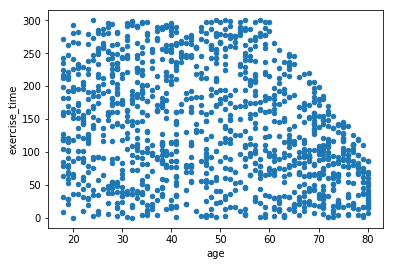

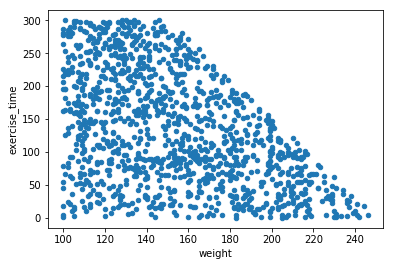

In [19]:
df1.plot.scatter('age', 'exercise_time')
df1.plot.scatter('weight', 'exercise_time')

## Scatter plot
shows that exercise time, if we assume it to mean measure of cardiovascular capacity (instead of, suppose, average daily exercise habit) - people of any age or weight can be 'all over the map' in terms of cardiovascular health.

There is no measure of weight loss, so it is quite unreasonable to suppose an inverted relationship between exercise time and weight.

It is not possible to assume that exercise time has an influence on age.


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
> Each observation has age, weight, exercise time ; 
> * age is independent, continuous but could be treated as ordinal in buckets
> * weight is independent, continuous
> * excersise_time is apparently dependent, continuous
2.  What are the relationships between the variables?
> * age and weight are exclusively independent of each other
> * exercise_time 'appears' to be dependent
3.  Which relationships are "real", and which spurious?
> * exercise_time appears to be a function of age and weight but in reality reflects a hidden/missing measure of "cardiovascular health." 
> * There are certainly some "old" people in good health, and while certainly cardiovascular capacity naturally decreases with age in general, more likely "weight" would be a better indicator of cardiovascular health over all ages -but only if it were possible to know whether the person is obese: without measures of body fat percentage and height, this cannot be inferred. A very "big" or tall person is not necessarily overweight nor in poor cardiovascular health.


## Weight and Age bins


In [0]:
abins = [18, 30, 42, 54, 66, 80]
wbins = [90, 130, 160, 190, 220, 250]
weight_bins = pd.cut(df1['weight'],wbins)
age_bins = pd.cut(df1['age'],abins)

In [0]:
?pd.crosstab #actually not helpful

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html

Inexcusable that agg funcs are not listed or not even a link!

Only trivial examples!

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
better examples but no guarantee of congruent syntax.


In [0]:
pd.crosstab(df1['weight'],age_bins) # just gives counts

In [0]:
pd.crosstab(df1['weight'],age_bins,values=df1['exercise_time'], aggfunc=np.mean)

an improvement but really need that weight bin!

In [47]:
pd.crosstab(weight_bins,age_bins,values=df1['exercise_time'], aggfunc=np.mean)

age,"(18, 30]","(30, 42]","(42, 54]","(54, 66]","(66, 80]"
weight,,,,,
"(90, 130]",185.039474,186.451923,205.972222,171.741379,93.106061
"(130, 160]",169.784810,178.075758,187.927273,166.066667,97.848485
"(160, 190]",120.866667,117.723404,123.418605,103.931818,84.000000
"(190, 220]",73.806452,61.290323,72.208333,75.761905,67.422222
"(220, 250]",21.400000,18.000000,22.800000,22.000000,38.526316


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)